In [2]:
import requests
from bs4 import BeautifulSoup as bs
import re

In [3]:
ua = {"User-Agent":"Mozilla/5.0"}
top1000_url = "https://www.whiskybase.com/whiskies/top1000"
top1000_page = requests.get(top1000_url, headers=ua)
top1000_soup = bs(top1000_page.text, "html")            #top1000리스트 주소 가져오기

In [4]:
top1000_list = top1000_soup.select(".clickable")
top1000_link_list = []
for index, element in enumerate(top1000_list, 1):
	top1000_link_list.append((element['href'],element.text))

In [7]:
'''whisky_link = top1000_link_list[0][0]
whisky_url = whisky_link
whisky_page = requests.get(whisky_url, headers=ua)
whisky_soup = bs(whisky_page.text, "html")'''

'whisky_link = top1000_link_list[0][0]\nwhisky_url = whisky_link\nwhisky_page = requests.get(whisky_url, headers=ua)\nwhisky_soup = bs(whisky_page.text, "html")'

In [5]:
whisky_list = []
for index in range(len(top1000_link_list)):

    whisky_link = top1000_link_list[index][0]
    whisky_url = whisky_link
    whisky_page = requests.get(whisky_url, headers=ua)
    whisky_soup = bs(whisky_page.text, "html")          #위스키 링크 하나씩 가져옴


    test_list = []


    for x in range(len(whisky_soup.select(".block-tasting")[0].select(".btn-tastingtag"))):     #테이스팅 태그
        tag_split = str(whisky_soup.select(".block-tasting")[0].select(".btn-tastingtag")[x]).split(">")[0]
        re_pre=re.compile('data-num?=?"?[0-9]?"')       #정규표현식
        tag_result=re_pre.findall(tag_split)
        tag_name_str = whisky_soup.select(".block-tasting")[0].select(".tag-name")[x].text.replace("\t","").replace("\n","")
        #정규 표현식 사용해서 테이스팅 태그 추출

        if(str(tag_result).split("\"")[1] == ""):
            tag_cnt = "0"
        else:
            tag_cnt = str(tag_result).split("\"")[1]
        test_list.append((tag_name_str,tag_cnt))


    for i in range(len(test_list)):
        for j in range(len(test_list)):
            if(test_list[i][0] < test_list[j][0]):
                tmp = test_list[i]
                test_list[i] = test_list[j]
                test_list[j] = tmp
    #테이스팅 태그만 있는 test_list를 sort해줌

    for x in range(len(whisky_soup.select("dl")[1].select("dt"))):
        test_list.insert(x,(whisky_soup.select("dl")[1].select("dt")[x].text, whisky_soup.select("dl")[1].select("dd")[x].text))
    #위스키 정보들 가져옴


    for i in range(3):
        if(whisky_soup.select(".wb--community-block")[i].select("h4")[0].text == ""):
            if(i == 0):
                test_list.insert(0,("Wishlist num", 0))
            elif(i == 1):
                test_list.insert(0,("Member ratings",0))
            elif(i == 2):
                test_list.insert(0,("Collection",0))
        else:
            if(i == 0):
                test_list.insert(0,("Wishlist num", whisky_soup.select(".wb--community-block")[i].select("h4")[0].text.replace("\n","").replace("\t","").split(" ")[0]))
            elif(i == 1):
                test_list.insert(0,("Member ratings",whisky_soup.select(".wb--community-block")[i].select("h4")[0].text.replace("\n","").replace("\t","").split(" ")[0]))
            elif(i == 2):
                test_list.insert(0,("Collection",whisky_soup.select(".wb--community-block")[i].select("h4")[0].text.replace("\n","").replace("\t","").split(" ")[0]))
    #wishlist, member rating, collection 리스트에 넣기. 존재 하지 않으면 0 넣어줌
    
    if not (whisky_soup.select(".block-price")):
        test_list.insert(0,("Price","NONE"))
    else:
        test_list.insert(0,("Price",whisky_soup.select(".block-price")[0].select("p")[-1].text))
    test_list.insert(0,("All Rating",float(whisky_soup.select("dl")[0].select("dd")[0].text.replace("\n","").split("/")[0])))
    test_list.insert(0,("Votes",int(whisky_soup.select("dl")[0].select("dd")[-1].text)))
    #가격, Rating, vote 들 test_list에 넣기.

    whisky_list.append(test_list)

In [13]:
len(whisky_list)

1000

In [12]:
whisky_list[0]

[('Votes', 43),
 ('All Rating', 96.3),
 ('Price', '€ 65431.00'),
 ('Collection', '51'),
 ('Member ratings', '43'),
 ('Wishlist num', '146'),
 ('Whiskybase ID', 'WB24413'),
 ('Category', 'Single Malt'),
 ('Distillery', 'Laphroaig'),
 ('Bottler', 'R. W. Duthie & Co. (RWD)'),
 ('Vintage', '1967'),
 ('Bottled', '1982'),
 ('Stated Age', '15 years old'),
 ('Casktype', 'Sherry Cask'),
 ('Number of bottles', '720'),
 ('Strength', '57.0 % Vol.'),
 ('Size', '750 ml'),
 ('Bottled for', 'Imported by S. Samaroli'),
 ('Market', ' Italy'),
 ('Added on', '26 jul 2011 1:19 pm'),
 ('Chocolate', '3'),
 ('Citric', '2'),
 ('Coal-gas', '2'),
 ('Cooked Fruit', '1'),
 ('Cooked Mash', '0'),
 ('Cooked Vegetable', '0'),
 ('Dried Fruit', '2'),
 ('Fragant', '0'),
 ('Fresh Fruit', '1'),
 ('Green-House', '0'),
 ('Hay-like', '0'),
 ('Honey', '0'),
 ('Husky', '0'),
 ('Kippery', '0'),
 ('Leafy', '0'),
 ('Leathery', '2'),
 ('Malt Extract', '0'),
 ('Medicinal', '0'),
 ('Mossy', '0'),
 ('New Wood', '0'),
 ('Nutty', '1'),


In [6]:
whisky_final_list = []
pd_index = []
for index in range(1000):
    tmp_list = []
    if index == 0:
        for x in range(len(whisky_list[0])):
            pd_index.append(whisky_list[0][x][0])
    for x in range(len(whisky_list[index])):
        tmp_list.append(whisky_list[index][x][1])
    whisky_final_list.append(tmp_list)

In [7]:

att_set=set()
for whisky in whisky_list:
    for k,v in whisky:
        att_set.add(k)


In [14]:
import pandas as pd

data_dc=dict()

cnt=0
for whisky in whisky_list:
    data=dict.fromkeys(att_set,)
    for k,v in whisky:
        data[k]=v
    tmp=pd.Series(data)
    data_dc[cnt]=tmp
    cnt+=1


    

In [15]:
data_df=pd.DataFrame(data_dc).T


In [16]:
data_df.head()

,Bottled for,Husky,Tobacco,Member ratings,Vintage,Category,Fresh Fruit,Yeasty,Honey,Price,...,Bottle code,Hay-like,Vegetative,Casknumber,Malt Extract,Cooked Mash,Plastic,Kippery,Mossy,Whiskybase ID
0,Imported by S. Samaroli,0,2,43,1967,Single Malt,1,0,0,€ 65431.00,...,None,0,0,None,0,0,0,0,0,WB24413
1,"Osteria Apostoli, Milan - Imported by Samaroli",0,0,20,1970,Single Malt,0,0,0,€ 8999.00,...,None,0,0,4367,0,0,0,0,0,WB23249
2,Samaroli,0,0,23,1967,Single Malt,0,0,0,€ 29750.00,...,None,0,0,None,0,1,0,0,0,WB12078
3,None,0,0,53,05.11.1964,Single Malt,0,0,0,€ 25410.00,...,None,0,0,None,0,0,0,0,0,WB17300
4,None,0,0,69,1966,Single Malt,0,0,0,€ 74688.00,...,None,0,0,None,0,0,0,0,0,WB8854


In [17]:
pd.set_option('display.max_rows', 61)
data_df.isnull().sum().divide(10)

Bottled for          79.1
Husky                 0.0
Tobacco               0.0
Member ratings        0.0
Vintage               7.7
Category              0.0
Fresh Fruit           0.0
Yeasty                0.0
Honey                 0.0
Price                 0.0
Label                90.1
Barcode              86.8
Vanilla               0.0
Distillery            1.8
Collection            0.0
Bottler               0.0
Number of bottles    41.8
Chocolate             0.0
Green-House           0.0
Added on              0.0
Sherried              0.0
Leathery              0.0
New Wood              0.0
Smokey                0.0
Calculated age       91.3
Toasted               0.0
Stated Age           27.5
Old Wood              0.0
Cooked Fruit          0.0
Leafy                 0.0
Fragant               0.0
Nutty                 0.0
Rubbery               0.0
Bottling serie       17.1
Dried Fruit           0.0
Citric                0.0
Oily                  0.0
Coal-gas              0.0
Cooked Veget

In [18]:
tastingtags=['Mash','Cooked Vegetable',
 'Sweaty',
 'New',
 'Oily',
 'Leafy',
 'Kippery',
 'Citric',
 'Sherried',
 'Mossy',
 'Nutty',
 'Toasted',
 'Solvent',
 'Malt',
 'Vegetable',
 'Old',
 'Medicinal',
 'Plastic',
 'Coal-gas',
 'Husky',
 'Yeasty',
 'Fruit',
 'Hay-like',
 'Leathery',
 'Vegetative',
 'Green-House',
 'Honey',
 'Extract',
 'Fresh',
 'Vanilla',
 'Cooked',
 'Tobacco',
 'Chocolate',
 'Smokey',
 'Wood',
 'Dried',
 'Sandy',
 'Rubbery',
 'Fragant','Fresh Fruit','Cooked Fruit','Malt Extract', 'Old Wood','Cooked Mash','Dried Fruit','New Wood']

In [19]:
len(tastingtags)

46

In [21]:
tastingtags_df=data_df.filter(items=tastingtags)

In [22]:
tastingtags_df.astype(int).sum()

Cooked Vegetable     18
Sweaty                7
Oily                 51
Leafy                15
Kippery              18
Citric               92
Sherried             88
Mossy                27
Nutty                53
Toasted              52
Solvent              14
Medicinal            37
Plastic              10
Coal-gas             45
Husky                10
Yeasty                6
Hay-like             33
Leathery             78
Vegetative            3
Green-House          14
Honey                70
Vanilla              49
Tobacco              65
Chocolate           109
Smokey               63
Sandy                 6
Rubbery               9
Fragant              22
Fresh Fruit          62
Cooked Fruit         48
Malt Extract         40
Old Wood             62
Cooked Mash           9
Dried Fruit         107
New Wood             49
dtype: int64

In [23]:
othertags=[x for x in list(data_df.columns) if x not in tastingtags]
othertags_df=data_df.filter(items=othertags)

In [24]:
temp=pd.DataFrame(othertags_df.isnull().sum())
temp

,0
Bottled for,791
Member ratings,0
Vintage,77
Category,0
Price,0
Label,901
Barcode,868
Distillery,18
Collection,0
Bottler,0


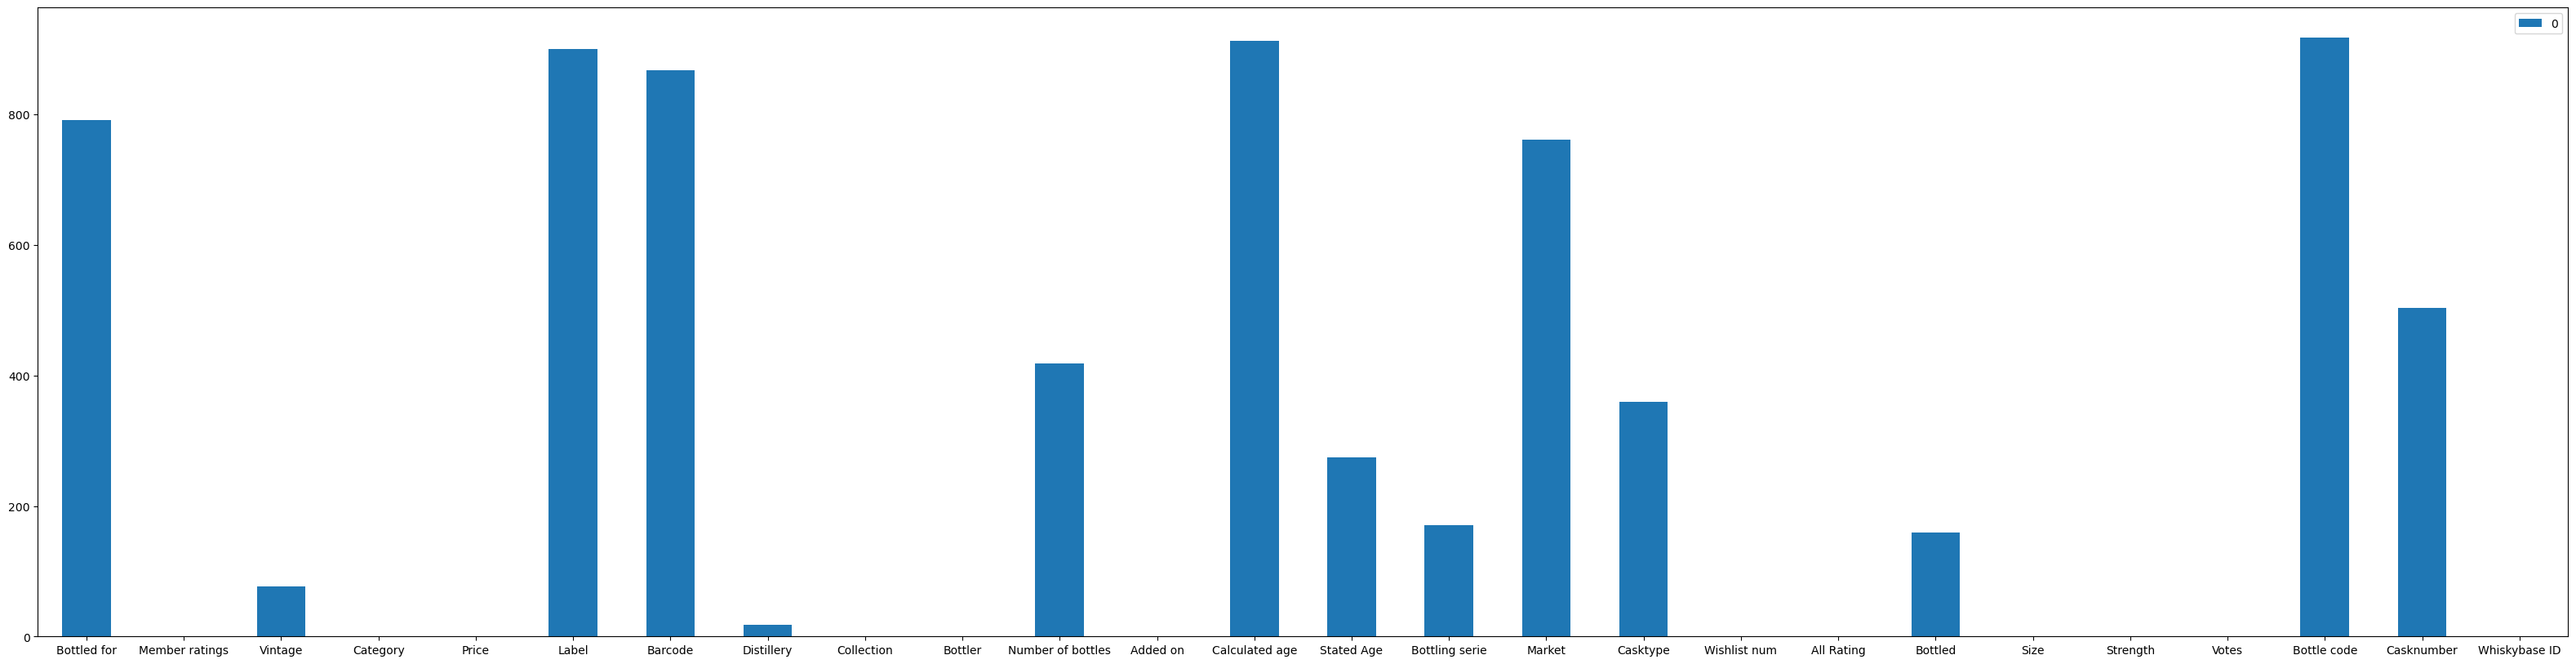

In [26]:
ax = temp.plot.bar(rot=0, figsize=(40, 10))#결측치 그래프